In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np  
import os, pathlib

In [2]:
# Constant important to our dataset
image_size = 256  # All this images is with this size
batch_size = 32  # Like a industry standard

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
data_dir = pathlib.Path(data_dir)

In [4]:
# We import our images dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(image_size, image_size),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [5]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(image_size, image_size),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [6]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


Images like a tf tensor of color scales
[[[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]]
Image


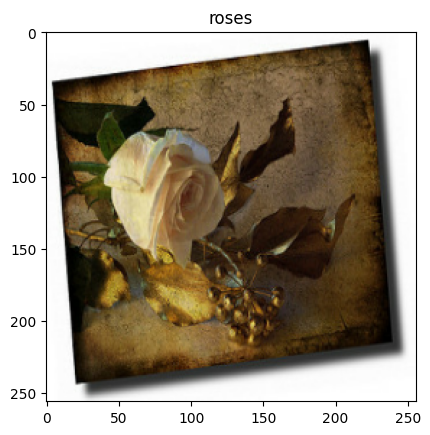

In [7]:
# The images are represented by pixels, each pixels has assigned a color between 0 - 255 and is read like a 3d numpy array with shape (Weight, High, 3)
for image_batch, label_batch in train_ds.take(1):  # Here we are taking the first batch (with 32 images each one)
    print("Images like a tf tensor of color scales")
    print(image_batch[0].numpy())
    print("Image")
    plt.imshow(image_batch[0].numpy().astype('uint8'))
    plt.title(class_names[label_batch[0]])

In [8]:
# Study this - is something with GPU
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

In [9]:
# Scale the data on the images - From RGB scale (0 - 255) to 0 - 1 scale (this is a layer to add to the final model)
normalization_layer = layers.Rescaling(1./255)

In [24]:
# Model creation - Convolutions neural networks
num_classes = len(class_names)

model = models.Sequential([
  layers.Rescaling(1./255, input_shape=(image_size, image_size, 3)),
  layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=(image_size, image_size, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

c:\Users\jesus\anaconda3\envs\personal_projects\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\jesus\anaconda3\envs\personal_projects\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [25]:
# We compile the model
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [26]:
# We train the model
history_model = model.fit(
    train_ds,
    epochs = 3,
    batch_size = batch_size,
    verbose = 1,
    validation_data = val_ds
)

Epoch 1/3


92/92 ━━━━━━━━━━━━━━━━━━━━ 81s 854ms/step - accuracy: 0.3040 - loss: 1.5116 - val_accuracy: 0.4046 - val_loss: 1.2588
Epoch 2/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 71s 773ms/step - accuracy: 0.4937 - loss: 1.1609 - val_accuracy: 0.5886 - val_loss: 1.0228
Epoch 3/3
92/92 ━━━━━━━━━━━━━━━━━━━━ 80s 859ms/step - accuracy: 0.6214 - loss: 0.9783 - val_accuracy: 0.6335 - val_loss: 0.9234


In [27]:
accuracy = history_model.history['accuracy']
valida_accuracy = history_model.history['val_accuracy']
loss = history_model.history['loss']
valida_loss = history_model.history['val_loss']

Text(0.5, 1.0, 'Training and Validation Loss')

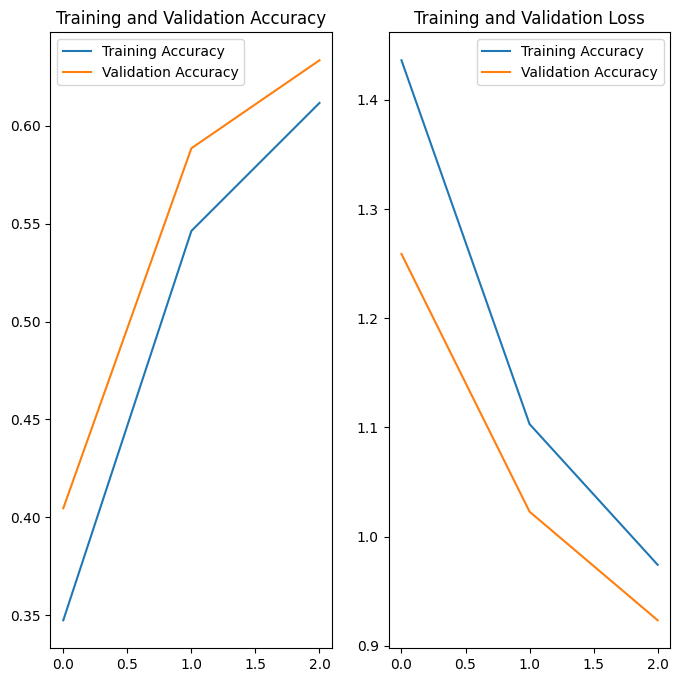

In [28]:
# We plot the history of the training
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(3), accuracy, label = 'Training Accuracy')
plt.plot(range(3), valida_accuracy, label = 'Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(3), loss, label = 'Training Accuracy')
plt.plot(range(3), valida_loss, label = 'Validation Accuracy')
plt.legend()
plt.title('Training and Validation Loss')

First image to predict
Actual label = dandelion

Prediction
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 776ms/step
[0.07132638 0.584153   0.17835703 0.01899893 0.14716469]
Predicted label: dandelion


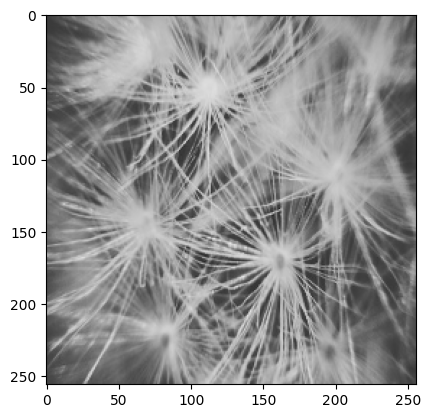

In [29]:
# First predictions and model evaluation with examples
for image_batch, label_batch in val_ds.take(1):
    first_image = image_batch[0].numpy().astype('uint8')
    first_label = label_batch[0]

    print('First image to predict')
    plt.imshow(first_image)
    print('Actual label =', class_names[first_label])
    print("")
    print("Prediction")
    batch_prediction = model.predict(image_batch)
    print(batch_prediction[0]) # Here we have the probabilities to belong each class
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 312ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


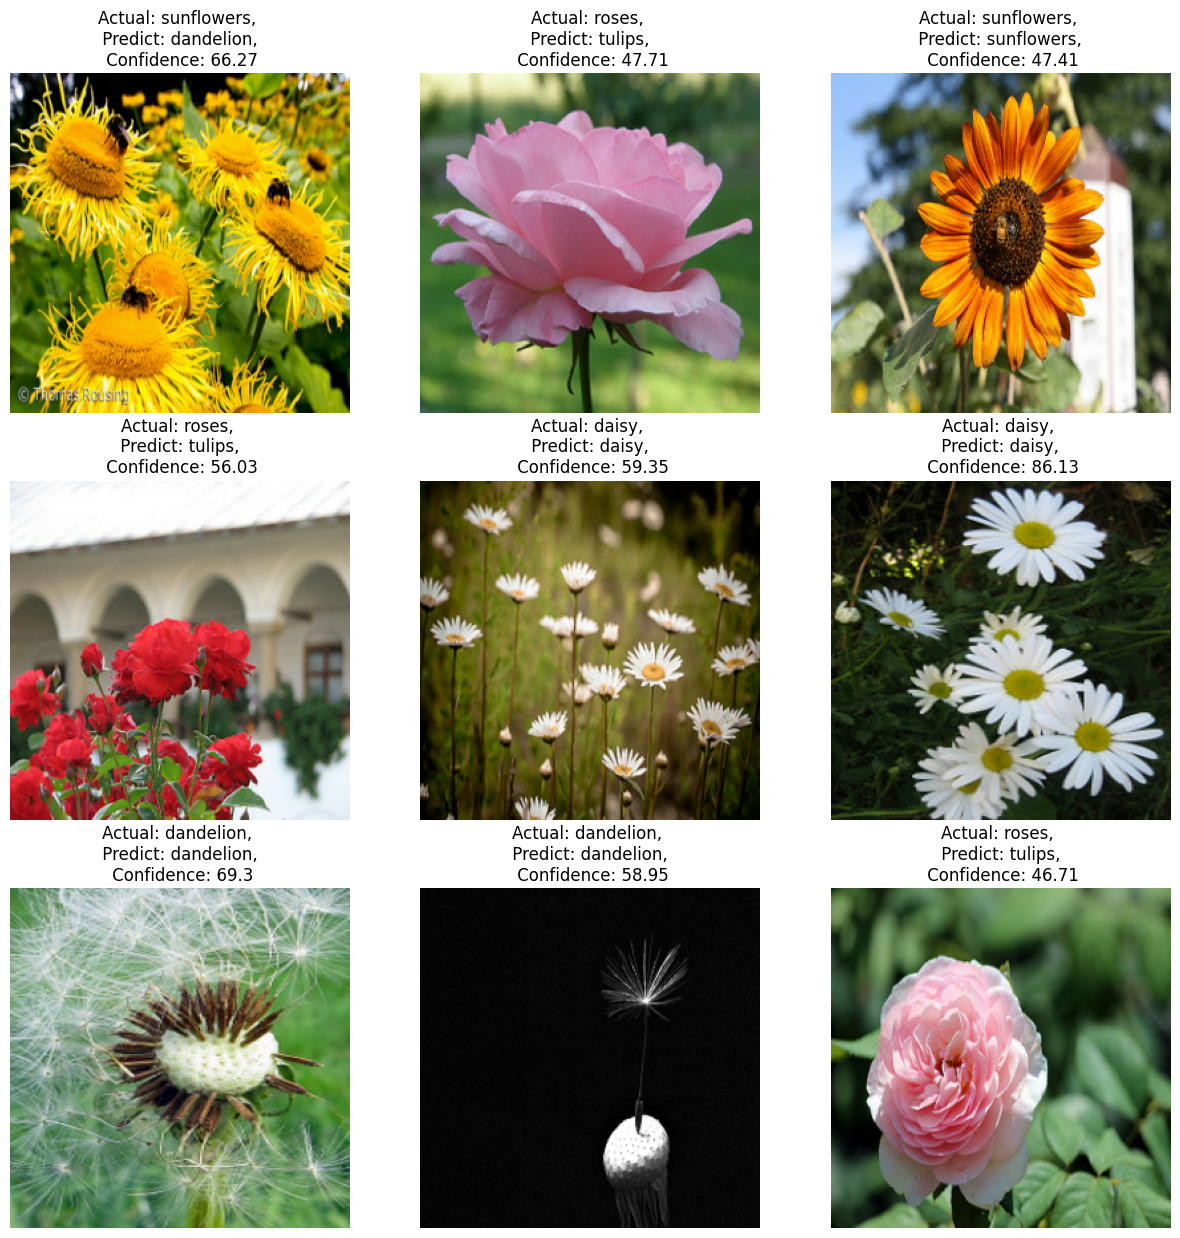

In [31]:
plt.figure(figsize=(15,15))
for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]

        plt.title("Actual: {}, \n Predict: {}, \n Confidence: {}".format(actual_class, predicted_class, confidence))
        plt.axis("off")

In [35]:
# Save model
model.save(f"model.h5")


In [37]:
#Load model
filepath = 'model.h5'
model_load = tf.keras.models.load_model(
    filepath, custom_objects=None, compile=True
)

In [39]:
def predict(model, images):
    img_array = tf.keras.preprocessing.image.img_to_array(images) # To convert the images into RGB scale tensor
    img_array = tf.expand_dims(img_array, 0) # To create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [38]:
sunflower_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/592px-Red_sunflower.jpg"
sunflower_path = tf.keras.utils.get_file('Red_sunflower', origin=sunflower_url)

img = tf.keras.utils.load_img(
    sunflower_path, target_size=(image_size, image_size)    
)

117948/117948 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
This image most likely belongs to tulips with a 52.77 percent confidence.


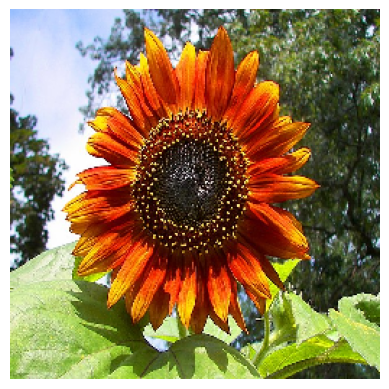

In [43]:
predicted_class, confidence = predict(model_load, img)

print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(predicted_class, confidence)
)
plt.imshow(img)
plt.axis('off')  # Ocultar los ejes
plt.show()